In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_pickle('my_df.pkl')

In [45]:
df.head(10)

,Race,Number of Deaths,Population,Crude Death Rate,Age Adjusted Death Rate,Confidence Interval,Standard Error,year
0,American Indian or Alaska Native,"1,878","2,832,761",66.3,138.3,3.4,0.0%,1999
1,Asian or Pacific Islander,"8,976","11,346,496",79.1,125.4,1.4,0.1%,1999
2,Black or African American,"63,124","36,173,121",174.5,257.3,1.0,0.7%,1999
3,White,"489,087","228,687,790",213.9,202.9,0.3,5.6%,1999
4,American Indian or Alaska Native,"1,959","2,984,150",65.6,130.8,3.2,0.0%,2000
5,Asian or Pacific Islander,"9,415","11,757,685",80.1,124.7,1.4,0.1%,2000
6,Black or African American,"63,081","36,594,309",172.4,253.1,1.0,0.7%,2000
7,White,"492,182","230,085,762",213.9,202.2,0.3,5.7%,2000
8,American Indian or Alaska Native,"2,213","3,097,333",71.4,140.0,3.2,0.0%,2001
9,Asian or Pacific Islander,"9,992","12,429,181",80.4,122.7,1.3,0.1%,2001


In [46]:
df.isna().sum()

Race                       0
Number of Deaths           0
Population                 0
Crude Death Rate           0
Age Adjusted Death Rate    0
Confidence Interval        0
Standard Error             0
year                       0
dtype: int64

In [48]:
# remove capitals and replace spaces with underscores in column names
old_names = list(df.columns)
formatted_names = []
for name in old_names:
    name = str.lower(name)
    name = name.replace(' ', '_')
    formatted_names.append(name)

mapper = dict(zip(old_names, formatted_names))
df.rename(mapper = mapper, axis = 1, inplace = True)
df.head()

,race,number_of_deaths,population,crude_death_rate,age_adjusted_death_rate,confidence_interval,standard_error,year
0,American Indian or Alaska Native,"1,878","2,832,761",66.3,138.3,3.4,0.0%,1999
1,Asian or Pacific Islander,"8,976","11,346,496",79.1,125.4,1.4,0.1%,1999
2,Black or African American,"63,124","36,173,121",174.5,257.3,1.0,0.7%,1999
3,White,"489,087","228,687,790",213.9,202.9,0.3,5.6%,1999
4,American Indian or Alaska Native,"1,959","2,984,150",65.6,130.8,3.2,0.0%,2000


In [49]:
df.dtypes

race                       object
number_of_deaths           object
population                 object
crude_death_rate           object
age_adjusted_death_rate    object
confidence_interval        object
standard_error             object
year                       object
dtype: object

In [53]:
need_numeric = ['number_of_deaths', 'population', 'crude_death_rate', 'age_adjusted_death_rate', 'confidence_interval', 'year']
for column in need_numeric:
    pd.to_numeric(df[column], errors = 'coerce')
df.dtypes

race                       object
number_of_deaths           object
population                 object
crude_death_rate           object
age_adjusted_death_rate    object
confidence_interval        object
standard_error             object
year                       object
dtype: object

In [56]:
df.dtypes

race                       float64
number_of_deaths           float64
population                 float64
crude_death_rate           float64
age_adjusted_death_rate    float64
confidence_interval        float64
standard_error             float64
year                         int64
dtype: object

In [6]:
racial_death_rate = df[['Race', 'death_rate']].groupby('Race').mean()
racial_death_rate['death_rate'] = racial_death_rate['death_rate'] / 1000
racial_death_rate.sort_values(by = 'death_rate', ascending = False)

,death_rate
Race,
White,0.207947
Black or African American,0.163773
Asian or Pacific Islander,0.081980
American Indian or Alaska Native,0.068773


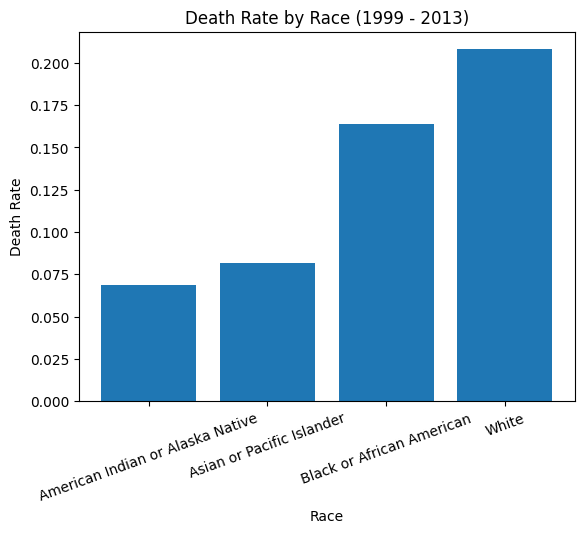

In [7]:
plt.bar(x = racial_death_rate.index, height = racial_death_rate['death_rate'])
plt.xticks(rotation = 20)
plt.title('Death Rate by Race (1999 - 2013)')
plt.ylabel('Death Rate')
plt.xlabel('Race')
plt.show()

In [8]:
death_rate_over_time = df[['year', 'death_rate']].groupby('year').mean()
death_rate_over_time['death_rate'] = death_rate_over_time['death_rate'] / 1000
death_rate_over_time

,death_rate
year,
1999,0.133450
2000,0.133000
2001,0.133425
2002,0.132050
2003,0.130750
2004,0.130550
2005,0.130900
2006,0.129050
2007,0.129100


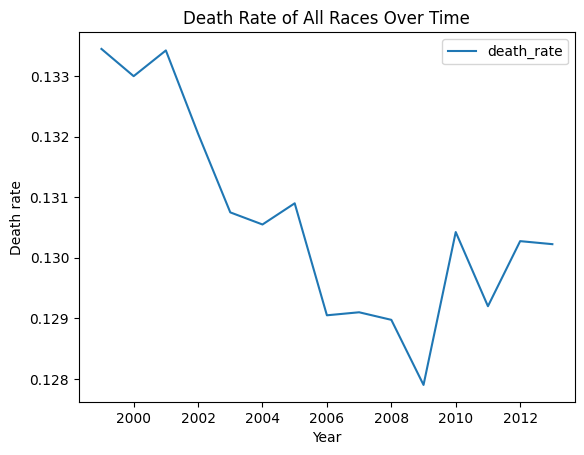

In [10]:
death_rate_over_time.plot(xlabel="Year", ylabel="Death rate", title = 'Death Rate of All Races Over Time')
plt.show()

In [27]:
df['Race'].unique()

array(['American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White'], dtype=object)

In [30]:
race_death_rate_over_time = df[['year', 'death_rate', 'Race']]

<Axes: xlabel='year,Race'>

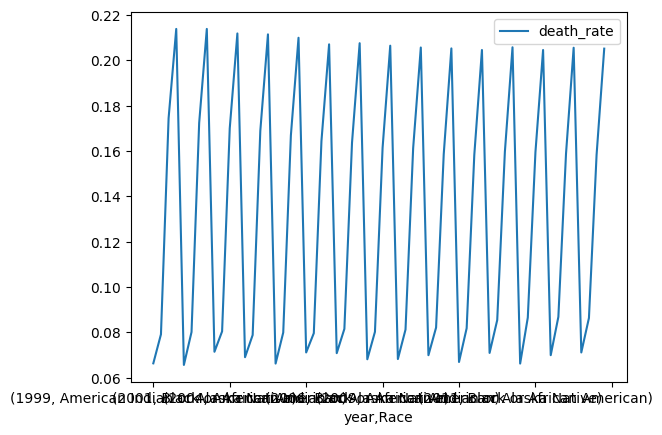

In [15]:
death_rate_over_time_by_race.plot()